In [1]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubham.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubham.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shubham.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from nltk.stem import PorterStemmer 

import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn import preprocessing
import os
import math

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading data
data_full = pd.read_csv("amazondata.csv")
data_full.head(5)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
# lemmatizer = WordNetLemmatizer()
# def LEMandSW(sent):
    
#     sent = sent.lower()
#     sent = re.sub(r"won't", "will not", sent)
#     sent = re.sub(r"can\'t", "can not", sent)
#     sent = re.sub(r"n\'t", " not", sent)
#     sent = re.sub(r"\'re", " are", sent)
#     sent = re.sub(r"\'s", " is", sent)
#     sent = re.sub(r"\'d", " would", sent)
#     sent = re.sub(r"\'ll", " will", sent)
#     sent = re.sub(r"\'t", " not", sent)
#     sent = re.sub(r"\'ve", " have", sent)
#     sent = re.sub(r"\'m", " am", sent)
  
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(sent)
#     return_sent = ""
  
#     for w in word_tokens:
#         if w not in stop_words:
#             return_sent += lemmatizer.lemmatize(w)+' ' 
#     return return_sent

In [5]:
data = data_full[["reviews.text","reviews.title","reviews.rating"]]
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34621 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34621 non-null  object 
 1   reviews.title   34621 non-null  object 
 2   reviews.rating  34621 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [6]:
data

,reviews.text,reviews.title,reviews.rating
0,This product so far has not disappointed. My c...,Kindle,5.0
1,great for beginner or experienced person. Boug...,very fast,5.0
2,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,5.0
3,I've had my Fire HD 8 two weeks now and I love...,Good!!!,4.0
4,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,5.0
...,...,...,...
34655,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,3.0
34656,Amazon should include this charger with the Ki...,Should be included,1.0
34657,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,1.0
34658,I was surprised to find it did not come with a...,Not worth the money,1.0


In [7]:
# """
# Created on Tue Nov 2 06:48:18 2020

# @author: shubham kumar
# """

# import os
# import pandas as pd
# from pandas import read_csv
# import re
# from bs4 import BeautifulSoup
# import glob
# # from nltk.tokenize import sent_tokenize

# # # Insert your cleaning logic ###

# def remove_html(text_data):
#     """remove_html takes raw text and removes html tags from the text.
#      ref: stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
#     """
#     soup = BeautifulSoup(text_data)
#     return soup.get_text()


# def text_cleaner(text):
#     text = re.sub(r"\\r\\n", ' ', text)
#     ## remove html params
#     text = re.sub('<br>', " ", text)
#     text = remove_html(text)

#     ## non-ascii characters removal
#     text = re.sub('&amp;', '', text)

#     # text = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', text)

#     text = re.sub(r'[^\x00-\x7F]', ' ', text)

#     ## removal of url links containing https:// and www.
#     '''
#     www_pat = r'www.[^ ]+'
#     http_pat = r'https?://[^ ]+'
#     combined_pat = r'|'.join((www_pat, http_pat))
#     text = re.sub(combined_pat,'',text.strip())
#     '''
#     text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)

#     """ Removes hastag in front of a word """
#     text = re.sub(r'#([^\s]+)', r'\1', text)

#     #     """ Removes emoticons from text """
#     #     text = re.sub(
#     #         ':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^'
#     #         '|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|'
#     #         '=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:',
#     #         '', text)

#     contraction_patterns = [(r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'),
#                             (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
#                             (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'),
#                             (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'),
#                             (r'wont', 'will not')]

#     patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
#     for (pattern, repl) in patterns:
#         (text, count) = re.subn(pattern, repl, text)

#     negative_words = {"isn't": "is not", "i\'m": "i am", "ain\'t": "is not", "aren't": "are not",
#                       "wasn't": "was not", "weren't": "were not",
#                       "haven't": "have not", "hasn't": "has not", "hadn't": "had not", "won't": "will not",
#                       "wouldn't": "would not", "don't": "do not", "doesn't": "does not", "didn't": "did not",
#                       "can't": "can not", "couldn't": "could not", "shouldn't": "should not", "mightn't": "might not",
#                       "mustn't": "must not"}

#     negative_pattern = re.compile(r'\b(' + '|'.join(negative_words.keys()) + r')\b')

#     ### substitution of negatvie mwords wiith respective words
#     text = negative_pattern.sub(lambda x: negative_words[x.group()], text)

#     ## now removing <br> patterns and underscores
#     # text = re.sub('_', " ", text)
#     text = remove_sig(text)

#     ## now removing email ids
#     text = re.sub('\S*@\S*\s?', '', text)
#     ##to remove extra whitespaces, now tokenize words and join them
#     #     text = re.sub(r"[^\w\.@-]", " ", text)
#     #     text = re.sub(",", " ", text)
#     #     text = re.sub("[-_<>]{2,}", " ", text)
#     text = re.sub(r"([^a-zA-Z0-9_.#]+)", " ", text)
#     text = text.replace(' n ', ' ')
#     text = text.replace(' n ', ' ')
#     text = ''.join([i for i in text if not i.isdigit()])
#     return text

In [8]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [9]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

### text_cleaning

In [10]:
from tqdm import tqdm
preprocessed_texts = []
# tqdm is for printing the status bar
for sentance in tqdm(data['reviews.text']):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_texts.append(sentance.strip())

100%|██████████████████████████████████████████████████████████████████████████| 34621/34621 [00:13<00:00, 2636.72it/s]


In [11]:
data['reviews.text'] = preprocessed_texts

In [12]:
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(data['reviews.title']):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_title.append(sentance.strip())

100%|██████████████████████████████████████████████████████████████████████████| 34621/34621 [00:10<00:00, 3387.42it/s]


In [13]:
data['reviews.title'] = preprocessed_title

## Preprocessing

### Lemmatization

In [14]:
# import these modules
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_word(text): 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return lemmas 


In [15]:
data

,reviews.text,reviews.title,reviews.rating
0,product far not disappointed children love use...,kindle,5.0
1,great beginner experienced person bought gift ...,fast,5.0
2,inexpensive tablet use learn step nabi thrille...,beginner tablet year old son,5.0
3,fire hd two weeks love tablet great value prim...,good,4.0
4,bought grand daughter comes visit set user ent...,fantastic tablet kids,5.0
...,...,...,...
34655,not appreciably faster higher amp charger used...,not appreciably faster charger,3.0
34656,amazon include charger kindle fact charging us...,included,1.0
34657,love kindle fire really disappointed kindle po...,disappointing charger,1.0
34658,surprised find not come type charging cords pu...,not worth money,1.0


In [16]:
lam_text = []
for text in data['reviews.text']:
    x = lemmatize_word(text)
    lemm = " ".join(x)
    lam_text.append(lemm)


In [17]:
data['reviews.text'] = lam_text

In [18]:
lam_title = []
for title in data['reviews.title']:
    x = lemmatize_word(title)
    lemm = " ".join(x)
    lam_title.append(lemm)


In [19]:
data['reviews.title'] = lam_title

In [20]:
data

,reviews.text,reviews.title,reviews.rating
0,product far not disappoint children love use l...,kindle,5.0
1,great beginner experience person buy gift love,fast,5.0
2,inexpensive tablet use learn step nabi thrill ...,beginner tablet year old son,5.0
3,fire hd two weeks love tablet great value prim...,good,4.0
4,buy grand daughter come visit set user enter a...,fantastic tablet kid,5.0
...,...,...,...
34655,not appreciably faster higher amp charger use ...,not appreciably faster charger,3.0
34656,amazon include charger kindle fact charge us e...,include,1.0
34657,love kindle fire really disappoint kindle powe...,disappoint charger,1.0
34658,surprise find not come type charge cord purcha...,not worth money,1.0


## EDA

In [32]:
data['reviews.rating'].value_counts()

5.0    23769
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

<AxesSubplot:>

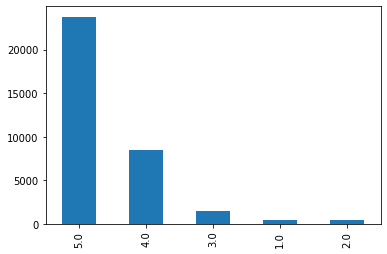

In [33]:
item_count = list(data['reviews.rating'].value_counts())
data['reviews.rating'].value_counts().plot.bar()

In [34]:
data

,reviews.text,reviews.title,reviews.rating
0,product far not disappoint children love use l...,kindle,5.0
1,great beginner experience person buy gift love,fast,5.0
2,inexpensive tablet use learn step nabi thrill ...,beginner tablet year old son,5.0
3,fire hd two weeks love tablet great value prim...,good,4.0
4,buy grand daughter come visit set user enter a...,fantastic tablet kid,5.0
...,...,...,...
34655,not appreciably faster higher amp charger use ...,not appreciably faster charger,3.0
34656,amazon include charger kindle fact charge us e...,include,1.0
34657,love kindle fire really disappoint kindle powe...,disappoint charger,1.0
34658,surprise find not come type charge cord purcha...,not worth money,1.0


In [ ]:
from tqdm import tqdm
from textblob import TextBlob

text = data['reviews.text']
correct_body = []

for sentence in tqdm(text):
    gfg = TextBlob(sentence)

    # using TextBlob.correct() method
    gfg = gfg.correct()

    correct_body.append(gfg)


In [ ]:
title = data['reviews.title']
correct_title = []

for sentence in tqdm(text):
    gfg = TextBlob(sentence)

    # using TextBlob.correct() method
    gfg = gfg.correct()

    correct_title.append(gfg)


In [18]:
data['reviews.text'] = correct_body
data['reviews.title'] = correct_title

In [21]:
data.to_csv('data.csv',index = False)

In [22]:
data

,reviews.text,reviews.title,reviews.rating
0,product far not disappoint children love use l...,kindle,5.0
1,great beginner experience person buy gift love,fast,5.0
2,inexpensive tablet use learn step nabi thrill ...,beginner tablet year old son,5.0
3,fire hd two weeks love tablet great value prim...,good,4.0
4,buy grand daughter come visit set user enter a...,fantastic tablet kid,5.0
...,...,...,...
34655,not appreciably faster higher amp charger use ...,not appreciably faster charger,3.0
34656,amazon include charger kindle fact charge us e...,include,1.0
34657,love kindle fire really disappoint kindle powe...,disappoint charger,1.0
34658,surprise find not come type charge cord purcha...,not worth money,1.0


### Word_cloud for text

In [23]:
from wordcloud import WordCloud,STOPWORDS
def createWrdCloudForSentiment(sentiments,new_df):
    #sentiment_num = 1 if sentiment== 1 else 0
    temp_df = new_df[new_df['reviews.rating']==sentiments]
    words = " ".join(temp_df['reviews.text'])
    cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT' and type(w) == str])

    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1500,
                      height=1000).generate(cleaned_words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

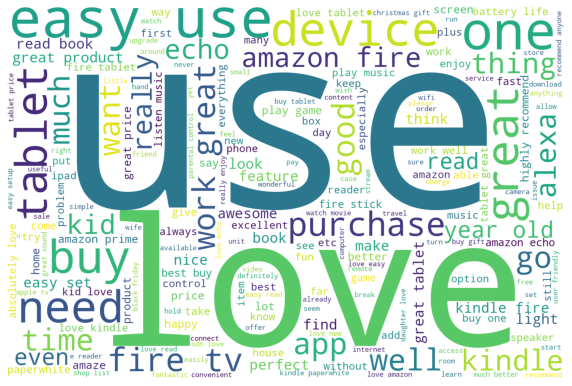

In [24]:
createWrdCloudForSentiment(5.0,data)

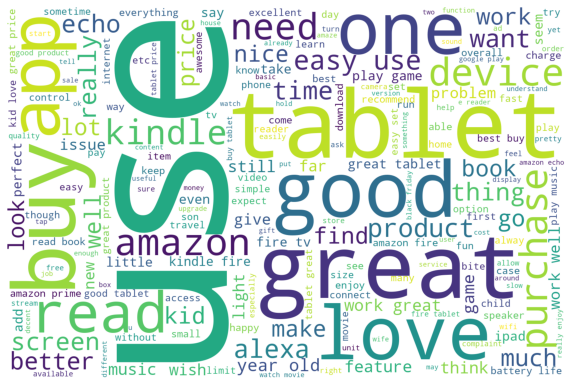

In [25]:
createWrdCloudForSentiment(4.0,data)

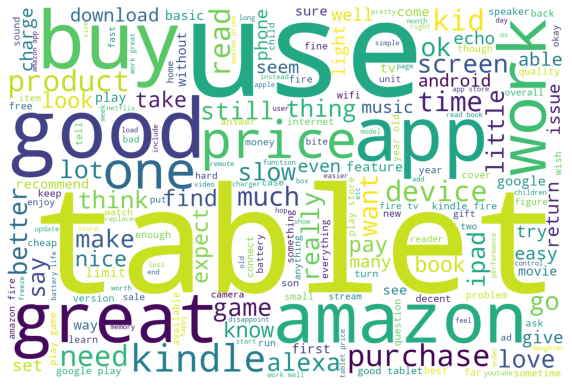

In [26]:
createWrdCloudForSentiment(3.0,data)

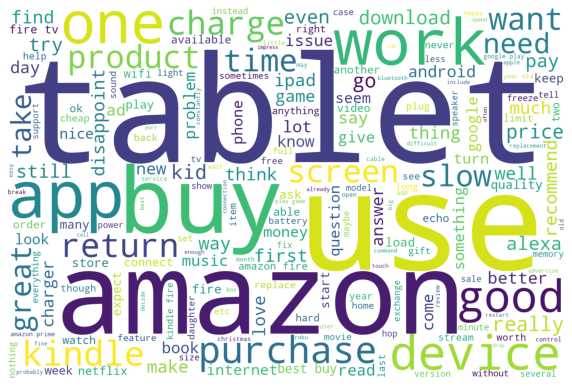

In [27]:
createWrdCloudForSentiment(2.0,data)

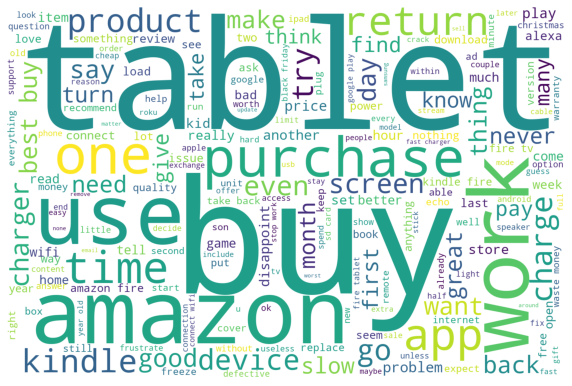

In [28]:
createWrdCloudForSentiment(1.0,data)

### word cloud for title

In [29]:
from wordcloud import WordCloud,STOPWORDS
def createWrdCloudForTitle(sentiments,new_df):
    #sentiment_num = 1 if sentiment== 1 else 0
    temp_df = new_df[new_df['reviews.rating']==sentiments]
    words = " ".join(temp_df['reviews.title'])
    cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT' and type(w) == str])

    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1500,
                      height=1000).generate(cleaned_words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

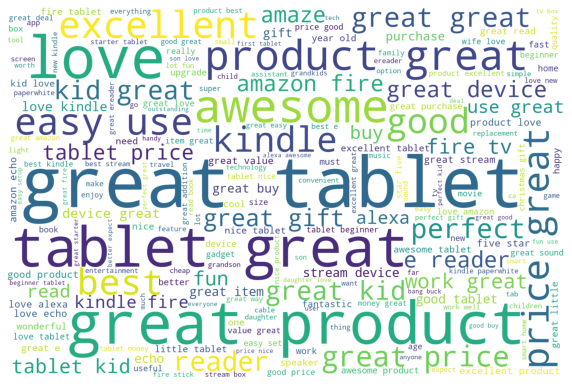

In [30]:
createWrdCloudForTitle(5.0,data)

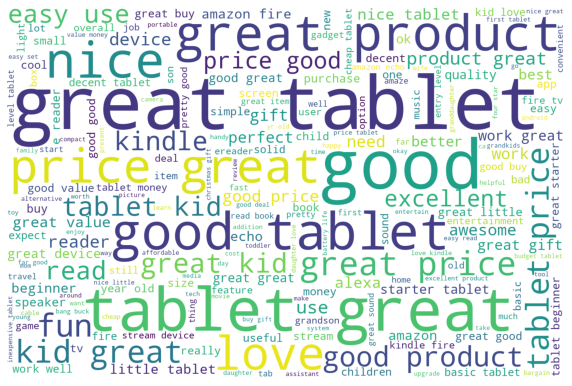

In [31]:
createWrdCloudForTitle(4.0,data)

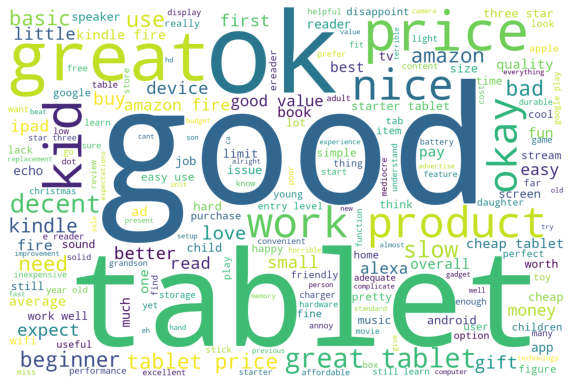

In [32]:
createWrdCloudForTitle(3.0,data)

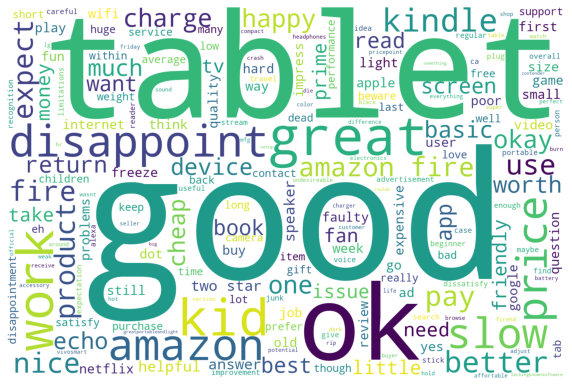

In [33]:
createWrdCloudForTitle(2.0,data)

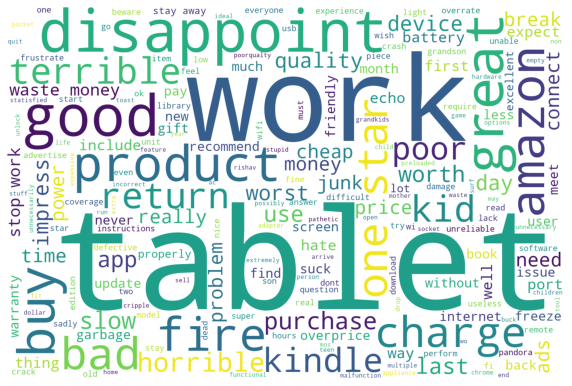

In [34]:
createWrdCloudForTitle(1.0,data)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

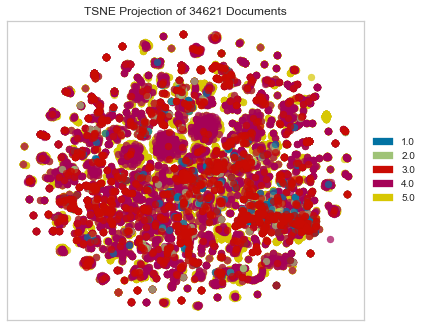

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer(ngram_range=(1,2))

X = tfidf.fit_transform(data['reviews.title'])
y = data['reviews.rating']

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

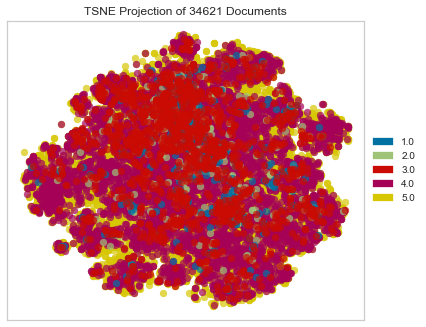

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer(ngram_range=(1,2))

X = tfidf.fit_transform(data['reviews.text'])
y = data['reviews.rating']

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()
plt.show()

In [53]:
sentiment = []

for i in data['reviews.rating'].values:
    if i == 1.0 or i == 2.0:
        sentiment.append(0)
    else:
        sentiment.append(1)

data['sentiment'] = sentiment

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


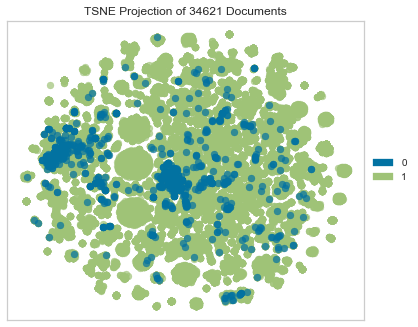

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(data['reviews.title'])
y = data['sentiment']

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


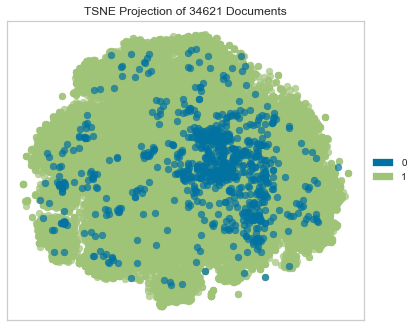

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(data['reviews.text'])
y = data['sentiment']

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()
plt.show()

In [62]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

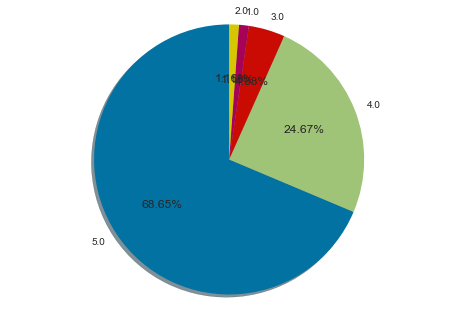

In [63]:
createPieChartFor(data['reviews.rating'])

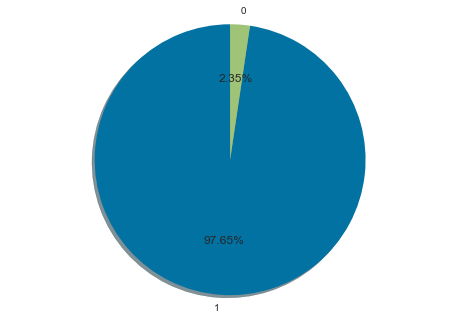

In [64]:
createPieChartFor(data['sentiment'])

## Feature Extraction

In [36]:
data['final'] = data['reviews.text']+data['reviews.title']


In [37]:
data

,reviews.text,reviews.title,reviews.rating,final
0,product far not disappoint children love use l...,kindle,5.0,product far not disappoint children love use l...
1,great beginner experience person buy gift love,fast,5.0,great beginner experience person buy gift love...
2,inexpensive tablet use learn step nabi thrill ...,beginner tablet year old son,5.0,inexpensive tablet use learn step nabi thrill ...
3,fire hd two weeks love tablet great value prim...,good,4.0,fire hd two weeks love tablet great value prim...
4,buy grand daughter come visit set user enter a...,fantastic tablet kid,5.0,buy grand daughter come visit set user enter a...
...,...,...,...,...
34655,not appreciably faster higher amp charger use ...,not appreciably faster charger,3.0,not appreciably faster higher amp charger use ...
34656,amazon include charger kindle fact charge us e...,include,1.0,amazon include charger kindle fact charge us e...
34657,love kindle fire really disappoint kindle powe...,disappoint charger,1.0,love kindle fire really disappoint kindle powe...
34658,surprise find not come type charge cord purcha...,not worth money,1.0,surprise find not come type charge cord purcha...


In [38]:
data.to_csv('data.csv',index = False)

In [67]:
X = data['final']
y = data['reviews.rating'].values

In [68]:

# vec = TfidfVectorizer()
# vec.fit(data['final'])
# X = vec.transform(data['final'])
# y = data['reviews.rating']

In [69]:
X

0        This product so far has not disappointed. My c...
1        great for beginner or experienced person. Boug...
2        Inexpensive tablet for him to use and learn on...
3        I have had my Fire HD  two weeks now and I lov...
4        I bought this for my grand daughter when she c...
                               ...                        
34655    This is not appreciably faster than any other ...
34656    Amazon should include this charger with the Ki...
34657    Love my Kindle Fire but I am really disappoint...
34658    I was surprised to find it did not come with a...
34659    to spite the fact that i have nothing but good...
Name: final, Length: 34621, dtype: object

In [57]:
data.head()

,reviews.text,reviews.title,reviews.rating,final,sentiment
0,This product so far has not disappointed. My c...,Kindle,5.0,This product so far has not disappointed. My c...,1
1,great for beginner or experienced person. Boug...,very fast,5.0,great for beginner or experienced person. Boug...,1
2,Inexpensive tablet for him to use and learn on...,Beginner tablet for our year old son.,5.0,Inexpensive tablet for him to use and learn on...,1
3,I have had my Fire HD two weeks now and I lov...,Good,4.0,I have had my Fire HD two weeks now and I lov...,1
4,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,5.0,I bought this for my grand daughter when she c...,1


## Training data

In [74]:
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download('stopwords')

from sklearn import metrics

from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubham.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
#Let's split the data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
vectorizer = TfidfVectorizer()
train_tfidf_model = vectorizer.fit_transform(X_train)
test_tfidf_model = vectorizer.transform(X_test)

In [72]:
train_tfidf = pd.DataFrame(train_tfidf_model)
test_tfidf = pd.DataFrame(test_tfidf_model)


In [75]:
cls = [LogisticRegression(),
       MultinomialNB(), 
       DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=200),
       KNeighborsClassifier(n_neighbors = 5)]

cls_name = []

In [78]:
# lbl_actual = test_df.abuse
# i = 0
# accuracy = []
# models = []
# for cl in cls:
#     model = cl.fit(train_tfidf_model,train_df.abuse)
#     lbl_pred = model.predict(test_tfidf_model)
#     a = (100*accuracy_score(lbl_pred, lbl_actual))
#     a = round(a,2)
#     accuracy.append(a)
#     cls_name.append(cl.__class__.__name__)
#     print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
#     print ( classification_report(lbl_pred, lbl_actual))
#     models.append(model)
#     i +=1

In [77]:
lbl_actual = y_test
i = 0
accuracy = []
models = []
for cl in cls:
    model = cl.fit(train_tfidf_model,y_train)
    lbl_pred = model.predict(test_tfidf_model)
    a = (100*accuracy_score(lbl_pred, lbl_actual))
    a = round(a,2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, lbl_actual))
    models.append(model)
    i +=1

LogisticRegression  Accuracy Score : 73.44%
              precision    recall  f1-score   support

         1.0       0.12      0.65      0.21        23
         2.0       0.01      0.08      0.02        12
         3.0       0.16      0.51      0.25       153
         4.0       0.34      0.53      0.42      1638
         5.0       0.93      0.78      0.85      8561

    accuracy                           0.73     10387
   macro avg       0.31      0.51      0.35     10387
weighted avg       0.82      0.73      0.77     10387

MultinomialNB  Accuracy Score : 69.3%
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.02      0.45      0.03       100
         5.0       1.00      0.70      0.82     10287

    accuracy                           0.69     10387
   macro avg       0.20      0.23      0.17     1

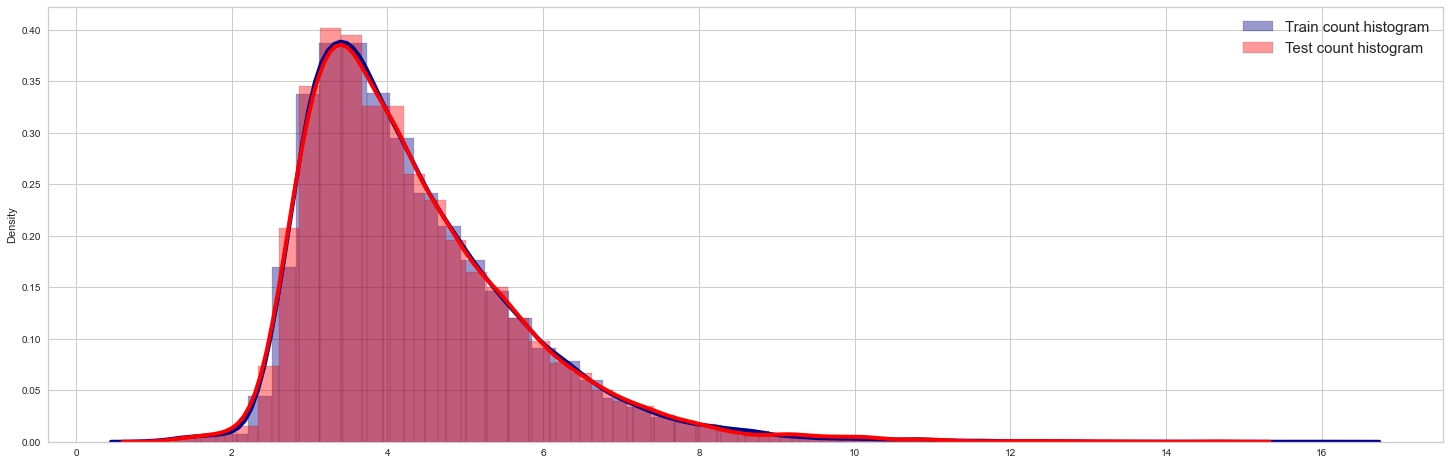

In [59]:
import seaborn as sns

plt.figure(figsize=(25,8))
sns.distplot(X_train.sum(axis=1).clip(0, 100), hist=True, kde=True, 
             bins=50, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label="Train count histogram")
sns.distplot(X_test.sum(axis=1).clip(0, 100), hist=True, kde=True, 
             bins=50, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label="Test count histogram")
plt.legend(fontsize=15)
plt.show()

## Modelling

1.MultinomialNB Classification

In [81]:
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nb = MultinomialNB()
nb.fit(train_tfidf_model,y_train)
pred_1 = nb.predict(test_tfidf_model)
print("The Accuracy score of MultinomialNB Classification is",round(accuracy_score(y_test, pred_1)*100,4),"%")
print("MAE ", mean_absolute_error(y_test, pred_1))

The Accuracy score of MultinomialNB Classification is 69.2982 %
MAE  0.40425531914893614


In [82]:
from sklearn.metrics import classification_report
print("-------------Classification Report -----------------")
print(classification_report(y_test, pred_1))

-------------Classification Report -----------------
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       120
         2.0       0.00      0.00      0.00       109
         3.0       0.00      0.00      0.00       480
         4.0       0.45      0.02      0.03      2518
         5.0       0.70      1.00      0.82      7160

    accuracy                           0.69     10387
   macro avg       0.23      0.20      0.17     10387
weighted avg       0.59      0.69      0.57     10387



In [84]:
! pip install mord

  Created wheel for mord: filename=mord-0.6-py3-none-any.whl size=6012 sha256=51654ab8d75119724db506534577e5d08e8113abc171fe901f90d47fa82304ac
  Stored in directory: c:\users\shubham.kumar\appdata\local\pip\cache\wheels\1d\94\48\b3d11f5f91d26bec0c95c6eb9c27c6e427d0b77fb2406d0e0a
Successfully built mord


2.Ordinal Regression

In [85]:
from mord import OrdinalRidge
ordr = OrdinalRidge()
ordr.fit(train_tfidf_model,y_train)
pred_2 = ordr.predict(test_tfidf_model)
print("The Accuracy score of Ordinal Regression is",round(accuracy_score(y_test, pred_2)*100,4),"%")
print("MAE ", mean_absolute_error(y_test, pred_2))

The Accuracy score of Ordinal Regression is 67.286 %
MAE  0.3594878213151054


In [89]:
train_tfidf_model[0]

<1x15290 sparse matrix of type '<class 'numpy.float64'>'
	with 37 stored elements in Compressed Sparse Row format>

In [97]:
X_train1 = train_tfidf_model.toarray().astype(int)
X_test1 = test_tfidf_model.toarray().astype(int)

In [100]:
type(X_test1)

numpy.ndarray

In [101]:
y_train

array([5., 4., 5., ..., 5., 5., 5.])

In [102]:
from mord import LogisticIT
ordr1 = LogisticIT()
ordr1.fit(X_train1,y_train.astype(int))
pred_ = ordr.predict(X_test1)
print("The Accuracy score of Ordinal Regression is",round(accuracy_score(y_test, pred_)*100,4),"%")
print("MAE ", mean_absolute_error(y_test, pred_))

The Accuracy score of Ordinal Regression is 24.2418 %
MAE  0.7911812842976798


In [103]:
from sklearn.metrics import classification_report
print("-------------Classification Report -----------------")
print(classification_report(y_test, pred_2))

-------------Classification Report -----------------
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       120
         2.0       0.12      0.04      0.06       109
         3.0       0.35      0.21      0.26       480
         4.0       0.39      0.49      0.44      2518
         5.0       0.82      0.79      0.80      7160

    accuracy                           0.67     10387
   macro avg       0.34      0.31      0.31     10387
weighted avg       0.68      0.67      0.67     10387



3.Support Vector Machine

In [106]:
X_train = train_tfidf_model
X_test = test_tfidf_model

In [107]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)
pred_3 = sv.predict(X_test)
print("The Accuracy score of Logistic Regression is",round(accuracy_score(y_test, pred_3)*100,4),"%")
print("MAE ", mean_absolute_error(y_test, pred_3))

The Accuracy score of Logistic Regression is 73.6883 %
MAE  0.3262732261480697


In [108]:
from sklearn.metrics import classification_report
print("-------------Classification Report -----------------")
print(classification_report(y_test, pred_3))

-------------Classification Report -----------------
              precision    recall  f1-score   support

         1.0       0.67      0.08      0.15       120
         2.0       0.00      0.00      0.00       109
         3.0       0.58      0.10      0.16       480
         4.0       0.56      0.28      0.37      2518
         5.0       0.76      0.96      0.85      7160

    accuracy                           0.74     10387
   macro avg       0.51      0.28      0.31     10387
weighted avg       0.70      0.74      0.69     10387



4.Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0, n_estimators=10)
rf.fit(X_train, y_train)
pred_4 = rf.predict(X_test)
print("The Accuracy score of Random Forest Classifier is",round(accuracy_score(y_test, pred_4)*100,4),"%")
print("MAE ", mean_absolute_error(y_test, pred_4))

The Accuracy score of Random Forest Classifier is 69.6833 %
MAE  0.37479541734860883


In [110]:
from sklearn.metrics import classification_report
print("-------------Classification Report -----------------")
print(classification_report(y_test, pred_4))

-------------Classification Report -----------------
              precision    recall  f1-score   support

         1.0       0.62      0.04      0.08       120
         2.0       0.12      0.01      0.02       109
         3.0       0.52      0.10      0.17       480
         4.0       0.43      0.22      0.29      2518
         5.0       0.74      0.93      0.82      7160

    accuracy                           0.70     10387
   macro avg       0.49      0.26      0.27     10387
weighted avg       0.64      0.70      0.65     10387



5.Logistic regression

In [113]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)
pred_5 = lg.predict(X_test)
print("The Accuracy score of KNN Classifier is",round(accuracy_score(y_test, pred_5)*100,4),"%")
print("MAE ", mean_absolute_error(y_test, pred_5))

The Accuracy score of KNN Classifier is 73.3898 %
MAE  0.32174833927024166


In [114]:
from sklearn.metrics import classification_report
print("-------------Classification Report -----------------")
print(classification_report(y_test, pred_5))

-------------Classification Report -----------------
              precision    recall  f1-score   support

         1.0       0.65      0.12      0.21       120
         2.0       0.08      0.01      0.02       109
         3.0       0.51      0.16      0.25       480
         4.0       0.53      0.34      0.42      2518
         5.0       0.78      0.93      0.85      7160

    accuracy                           0.73     10387
   macro avg       0.51      0.31      0.35     10387
weighted avg       0.70      0.73      0.70     10387



## Evaluation